In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
epochs = 30

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
for i in range(60000):#Training the MNIST train data
  if y_train[i] == (1 or 2 or 3 or 4 or 5 or 7):
    y_train[i] = 1
  elif y_train[i] == (0 or 6 or 9):               #number of regions formed in the 28*28 cells
    y_train[i] = 2
  elif y_train[i] == 8:
    y_train[i] = 3
    
for i in range(10000):
  if y_test[i] == (1 or 2 or 3 or 5 or 7):
    y_test[i] = 1
  elif y_test[i] == (0 or 6 or 9):
    y_test[i] = 2
  elif y_test[i] == 8:
    y_test[i] = 3

In [0]:
x_train = x_train.reshape(60000, 784)
y_train = keras.utils.to_categorical(y_train, 10)

In [0]:
x_test = x_test.reshape(10000, 784)
y_test= keras.utils.to_categorical(y_test, 10)

In [0]:
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
model = keras.models.Sequential()

In [9]:
model.add(keras.layers.Dense(100, input_dim= 784, activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.SGD(lr= 0.05), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose =1, validation_data= (x_test, y_test))
val = model.evaluate(x_test, y_test, verbose = 0)
print('Lose: ', val[0])
print('Accuracy: ', val[1] * 100, '%')
print(train.history)
print(val)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.5322 - acc: 0.8504 - val_loss: 0.3181 - val_acc: 0.9078
Epoch 2/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.2927 - acc: 0.9145 - val_loss: 0.2611 - val_acc: 0.9244
Epoch 3/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.2470 - acc: 0.9276 - val_loss: 0.2301 - val_acc: 0.9341
Epoch 4/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.2182 - acc: 0.9369 - val_loss: 0.2095 - val_acc: 0.9378
Epoch 5/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.1972 - acc: 0.9427 - val_loss: 0.1931 - val_acc: 0.9439
Epoch 6/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.1804 - acc: 0.9473 - val_loss: 0.1824 - val_acc: 0.9457
Epoch 7/30
60000/60000 [==============================] - 2s 34us/step - loss: 0

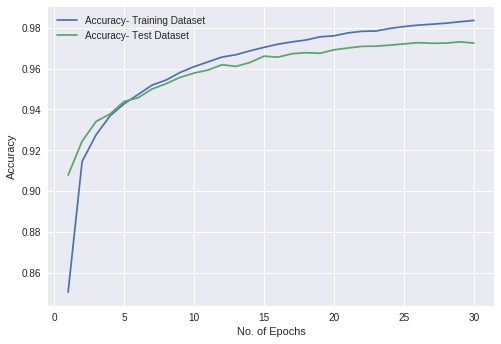

In [22]:
plt.plot(range(1,31),train.history['acc'],range(1,31), train.history['val_acc'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Accuracy- Training Dataset', 'Accuracy- Test Dataset'))
plt.show()